In [1]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

c:\python\python35\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Word2Vec(vocab=14, size=100, alpha=0.025)
['yet', 'and', 'this', 'sentence', 'is', 'word2vec', 'one', 'first', 'second', 'another', 'the', 'for', 'more', 'final']
[ -2.50403536e-03   2.52033584e-03   2.29293900e-03   5.32550388e-04
  -2.18292163e-03   7.56682188e-04   2.66690785e-03  -4.89700120e-04
   4.29872947e-04  -3.13808676e-03  -4.58047213e-03  -4.29767213e-04
  -3.41724465e-03  -2.42848368e-03  -2.98643834e-03  -4.79878811e-03
  -4.00319323e-03   3.83614236e-03  -4.27501230e-03  -4.16864362e-03
   2.55447975e-03   3.58116045e-03   4.50229691e-03   4.05640947e-03
  -2.18387437e-03  -2.35807686e-03  -4.38817451e-03   2.18001613e-03
  -4.71182307e-03   7.61677104e-04   4.41854168e-03   2.85782292e-03
   3.15858773e-03   4.06280207e-03  -1.73330773e-03   3.91737185e-03
  -5.20645932e-04  -3.37739754e-03  -3.78714432e-03  -1.39122619e-03
   2.85896589e-04  -8.42773807e-05  -1.62677735e-03  -1.11111207e-03
  -4.20235470e-03   3.04120756e-03   2.68976996e-03  -2.14528455e-03
  -3.6092

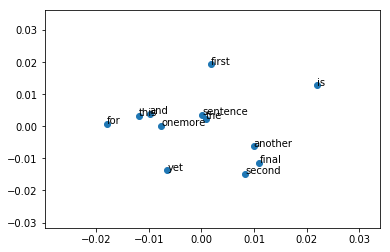

In [2]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for'],
             ['this', 'is', 'the', 'second', 'sentence'],
             ['yet', 'another', 'sentence'],
             ['one''more', 'sentence'],
             ['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [1]:
from gensim.models import KeyedVectors
import time

# load the google word2vec model
filename = 'GoogleNews-vectors-negative300.bin'
start = time.time()
model = KeyedVectors.load_word2vec_format(filename, binary=True)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
end = time.time()
print(result)
print(str(end - start) + " seconds")

c:\python\python35\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


[('queen', 0.7118192315101624)]
118.49882864952087 seconds
